In [6]:
import numpy as np

In [1]:
sum_t = 186
N = 4

In [4]:
sum_t / (N-1)

62.0

In [5]:
sum_t / (N+1)

37.2

In [7]:
sum_t / ((N-1)*np.sqrt(N-2))

43.84062043356594

In [8]:
sum_t / (N+1)**(3/2)

16.636345752598434

In [19]:

from stan_utilities import plot_traces, plot_posteriors, posterior_stats

In [85]:
import pystan

model_code = """
data {
    int<lower=1> N;      // number of waiting times
    real<lower=0> t[N];  // waiting times [in days]
}
parameters {
    real<lower=0> tau;   // lifetime [in days]
}
model {
    target += log(1/tau);  // log-prior
    for (n in 1:N){
        target += log(1/tau) - t[n] / tau;  // log-likelihood
    }
}
"""
model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ecccceec3ac698c45f03a5f293b55a1f NOW.


In [86]:
data = {'N': 4, 't': [31, 51, 40, 64]}

In [87]:
fit = model.sampling(data=data,
                     algorithm='NUTS',
                     chains=4,
                     iter=2000,
                     warmup=1000,
                     thin=1,
                     seed=123456)

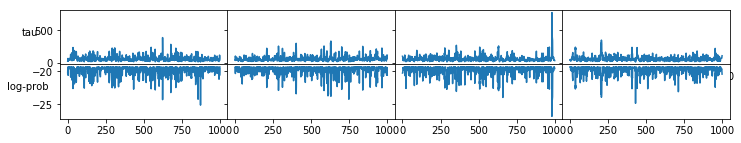

In [88]:
plot_traces(fit)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


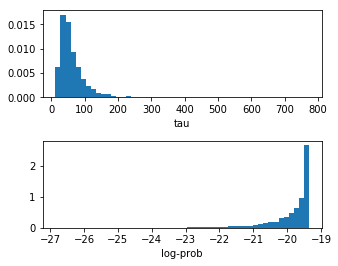

In [89]:
plot_posteriors(fit)

In [90]:
posterior_stats(fit)

{'par': ['tau', 'log-prob'],
 'mean': array([ 62.84593034, -19.888913  ]),
 'std': array([41.66087082,  0.72721259]),
 'corr': array([[ 1.        , -0.62760067],
        [-0.62760067,  1.        ]])}

In [91]:
tau_samples = fit.extract()['tau']

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
from scipy.stats import invgamma, norm

In [80]:
from scipy.special import gamma

In [113]:
?norm

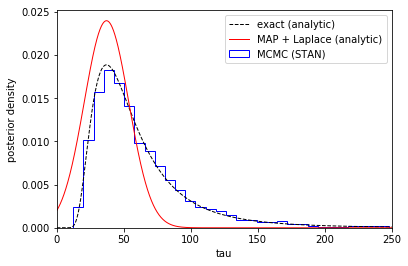

In [124]:
plt.figure(figsize=(6,4))
x = np.linspace(0,800, 8000)
plt.plot(x, invgamma.pdf(x, N, scale=sum_t), 'k--', lw=1, label='exact (analytic)')
plt.plot(x, norm.pdf(x, loc=37.20, scale=16.64), 'r-', lw=1, label='MAP + Laplace (analytic)')
plt.hist(tau_samples, bins=100, density=True, label='MCMC (STAN)', 
         histtype='step', color='b')


plt.xlabel('tau')
plt.ylabel('posterior density')
plt.xlim([0,250])
plt.legend()

plt.savefig('./tau_posterior.pdf', bbox_inches='tight')
plt.show()